In [1]:
!pip install pandas
!pip install pickle-mixin
!pip install matplotlib

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=e7f1a5776a818adc3c679fb403ba4210291fa28d2c30181527c7b08753833e2d
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [2]:
!gdown --id 1IV_nodlm-dw-EWl1DtngkATgAldEdAGO # download pickle
!gdown --id 15xj8tQ9DF1B8ZZCK9KfSKnhvDydwfQTk
!gdown --id 16aH8Y05OD9uk6zek8kTKQZS21SDopm30
!gdown --id 16f2aGbV_MlR2QlgosD7C4saZIb1TCsLf
!gdown --id 16T1Ebt9rEwzpFXZPKLt_0zdkA23_zQ-m
!gdown --id 16HmaDk5NJYibrvjApTGPCAWsL6ClGttl
!gdown --id 16nGo42kKP9JrcpyyWzulf6TeHbIuMAYz
!gdown --id 16tjPu73ctm3MJXCdMb1GAkkec-H5bmkZ
!gdown --id 1610S7q5nsINwlYmiggZFumQtC4Mtr656
!gdown --id 172orWfZcMAexjDPgYGPWtFZmoJjnJegG
!gdown --id 15sbcdFGZlRPys2ljvrO-N9xmYMqGwmdh
!gdown --id 16tz-5yFCk09qaLC6vPHEVAoUEuBKc067
!gdown --id 15xuGMJyDMJng8S4DSODPna8SgIZfgpHu
!gdown --id 1592TZuICOat_VV7CqiwXjcDyjdFmB7cs
!gdown --id 16NdU_4nXMvSIa3zYtEkwWlrKH0g6FLJv

Downloading...
From: https://drive.google.com/uc?id=1IV_nodlm-dw-EWl1DtngkATgAldEdAGO
To: /content/dataset.pickle
100% 93.3M/93.3M [00:00<00:00, 113MB/s] 
Downloading...
From: https://drive.google.com/uc?id=15xj8tQ9DF1B8ZZCK9KfSKnhvDydwfQTk
To: /content/bert.csv
100% 457k/457k [00:00<00:00, 24.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=16aH8Y05OD9uk6zek8kTKQZS21SDopm30
To: /content/bert.txt
100% 3.79k/3.79k [00:00<00:00, 5.61MB/s]
Downloading...
From: https://drive.google.com/uc?id=16f2aGbV_MlR2QlgosD7C4saZIb1TCsLf
To: /content/most_likely_sense_loose.txt
100% 212k/212k [00:00<00:00, 24.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=16T1Ebt9rEwzpFXZPKLt_0zdkA23_zQ-m
To: /content/most_likely_sense_strict.txt
100% 215k/215k [00:00<00:00, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=16HmaDk5NJYibrvjApTGPCAWsL6ClGttl
To: /content/most_likely_sense.csv
100% 9.47M/9.47M [00:00<00:00, 56.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=16

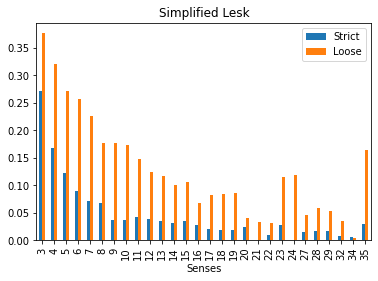

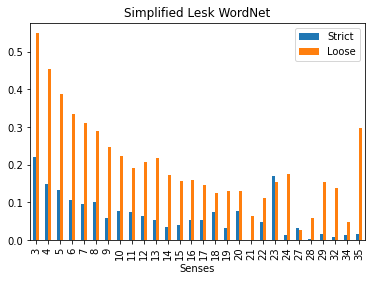

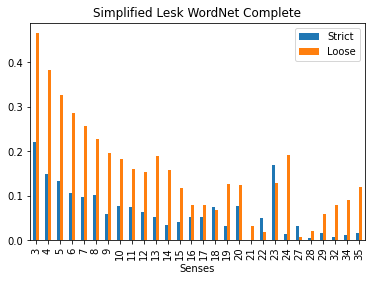

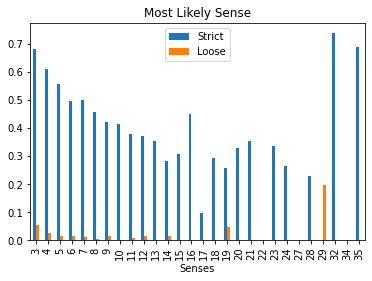

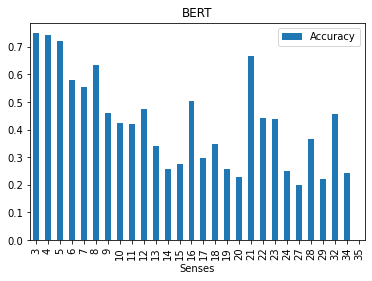

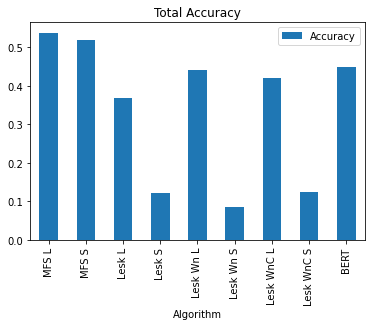

In [7]:
import pandas
import pickle
import matplotlib.pyplot as plt


with open("dataset.pickle", "rb") as pickleFile:
    db = pickle.load(pickleFile)

def numberOfSensuri(word):
    number_of_correct_senses = len(db[word][0]['synsets'].split(' ')) -1
    return number_of_correct_senses

def setStrict(data,file_strict):
    data.loc[:,'Strict']=0
    with open(file_strict, "rt", encoding="utf-8") as f:
        lines_strict = f.readlines()

        disct_strict = {}
        vector_dict_strict=[]

        for line in lines_strict[:-1]:
            words=line.split(' ')
            word=words[4]
            word = word[:-1]
            accuracy_scores=words[5].split('/')
            if(int(accuracy_scores[1])==0):
                score=0
            else:
                score=int(accuracy_scores[0])/int(accuracy_scores[1])

            vector_dict_strict.append({"word": word , "accuracy": score })
            data.loc[data['word'] == word, 'Strict'] = score


def setLoose(data,file_loose):
    data.loc[:,'Loose']=0
    with open(file_loose, "rt", encoding="utf-8") as f:
        lines_loose = f.readlines()

        dict_loose = {}
        vector_dict_loose=[]

        for line in lines_loose[:-1]:
            words=line.split(' ')
            word=words[4]
            word = word[:-1]
            accuracy_scores=words[5].split('/')
            if(int(accuracy_scores[1])==0):
                score=0
            else:
                score=int(accuracy_scores[0])/int(accuracy_scores[1])

            vector_dict_loose.append({"word": word , "accuracy": score })
            data.loc[data['word'] == word, 'Loose'] = score

    
def createStat(filename,file_loose,file_strict,title_):
    data=pandas.read_csv(filename)
    data.loc[:,'Senses']=0
    

    setLoose(data,file_loose)
    
    setStrict(data,file_strict)

    for word in db:
        data.loc[data['word'] == word, 'Senses'] = numberOfSensuri(word)

    average_sense = data.groupby('Senses',as_index=False).mean()
    average_sense.plot(y = ['Strict','Loose'],x = 'Senses',kind="bar",title=title_)

    plt.legend()
    plt.show()

def setAccuracy(data,txtfile):
    data.loc[:,'Acurracy']=0
    with open(txtfile, "rt", encoding="utf-8") as f:
        lines = f.readlines()

        for line in lines[:-1]:
            words=line.split(' ')
            word=words[4]
            word = word[:-1]
            accuracy_scores=words[5].split('/')
            if(int(accuracy_scores[1])==0):
                score=0
            else:
                score=int(accuracy_scores[0])/int(accuracy_scores[1])

            data.loc[data['word'] == word, 'Accuracy'] = score

def createStatForBERT(csvfile, txtfile):
    data=pandas.read_csv(csvfile)
    data.loc[:,'Senses']=0

    setAccuracy(data, txtfile)
    
    for word in db:
        data.loc[data['word'] == word, 'Senses'] = numberOfSensuri(word)

    average_sense = data.groupby('Senses',as_index=False).mean()
    average_sense.plot(y = ['Accuracy'],x = 'Senses',kind="bar",title="BERT")

    plt.legend()
    plt.show()

def addAccuracyForAlg(alg, df, txtfile):
    with open(txtfile, "rt", encoding="utf-8") as f:
            lines = f.readlines()
            numbers = lines[-1].split()[2].split('/')
            val = int(numbers[0]) / int(numbers[1])
            df.loc[len(df.index)] = [alg, val]

def addAccuracyForBERT(df):
    bertdf = pandas.DataFrame(columns = ["Accuracy"])
    with open("bert.txt", "rt", encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            words=line.split(' ')
            word=words[4]
            word = word[:-1]
            accuracy_scores=words[5].split('/')
            if(int(accuracy_scores[1])==0):
                score=0
            else:
                score=int(accuracy_scores[0])/int(accuracy_scores[1])
            bertdf.loc[len(bertdf.index)] = score

    bertavg = bertdf.mean()
    avg = bertavg['Accuracy']
    df.loc[len(df.index)] = ["BERT", avg]

def createGlobalGraph():
    df = pandas.DataFrame(columns = ["Algorithm", "Accuracy"])
    addAccuracyForAlg("MFS L", df, "most_likely_sense_loose.txt")
    addAccuracyForAlg("MFS S", df, "most_likely_sense_strict.txt")
    addAccuracyForAlg("Lesk L", df, "simplified_lesk_loose.txt")
    addAccuracyForAlg("Lesk S", df, "simplified_lesk_strict.txt")
    addAccuracyForAlg("Lesk Wn L", df, "simplified_lesk_wordnet_loose.txt")
    addAccuracyForAlg("Lesk Wn S", df, "simplified_lesk_wordnet_strict.txt")
    addAccuracyForAlg("Lesk WnC L", df, "simplified_lesk_wordnet_complete_loose.txt")
    addAccuracyForAlg("Lesk WnC S", df, "simplified_lesk_wordnet_complete_strict.txt")
    addAccuracyForBERT(df)
    
    df.plot(y = 'Accuracy',x = 'Algorithm',kind="bar",title="Total Accuracy")

    plt.legend()
    plt.show()

def main():

    createStat("simplified_lesk.csv","simplified_lesk_loose.txt","simplified_lesk_strict.txt","Simplified Lesk")
    createStat("simplified_lesk_wordnet.csv","simplified_lesk_wordnet_loose.txt","simplified_lesk_wordnet_complete_strict.txt","Simplified Lesk WordNet")
    createStat("simplified_lesk_wordnet_complete.csv","simplified_lesk_wordnet_complete_loose.txt","simplified_lesk_wordnet_complete_strict.txt","Simplified Lesk WordNet Complete")
    createStat("most_likely_sense.csv","most_likely_sense_loose.txt","most_likely_sense_strict.txt","Most Likely Sense")
    
    createStatForBERT("bert.csv", "bert.txt")
    createGlobalGraph()
    return


if __name__ == "__main__":
    main()

